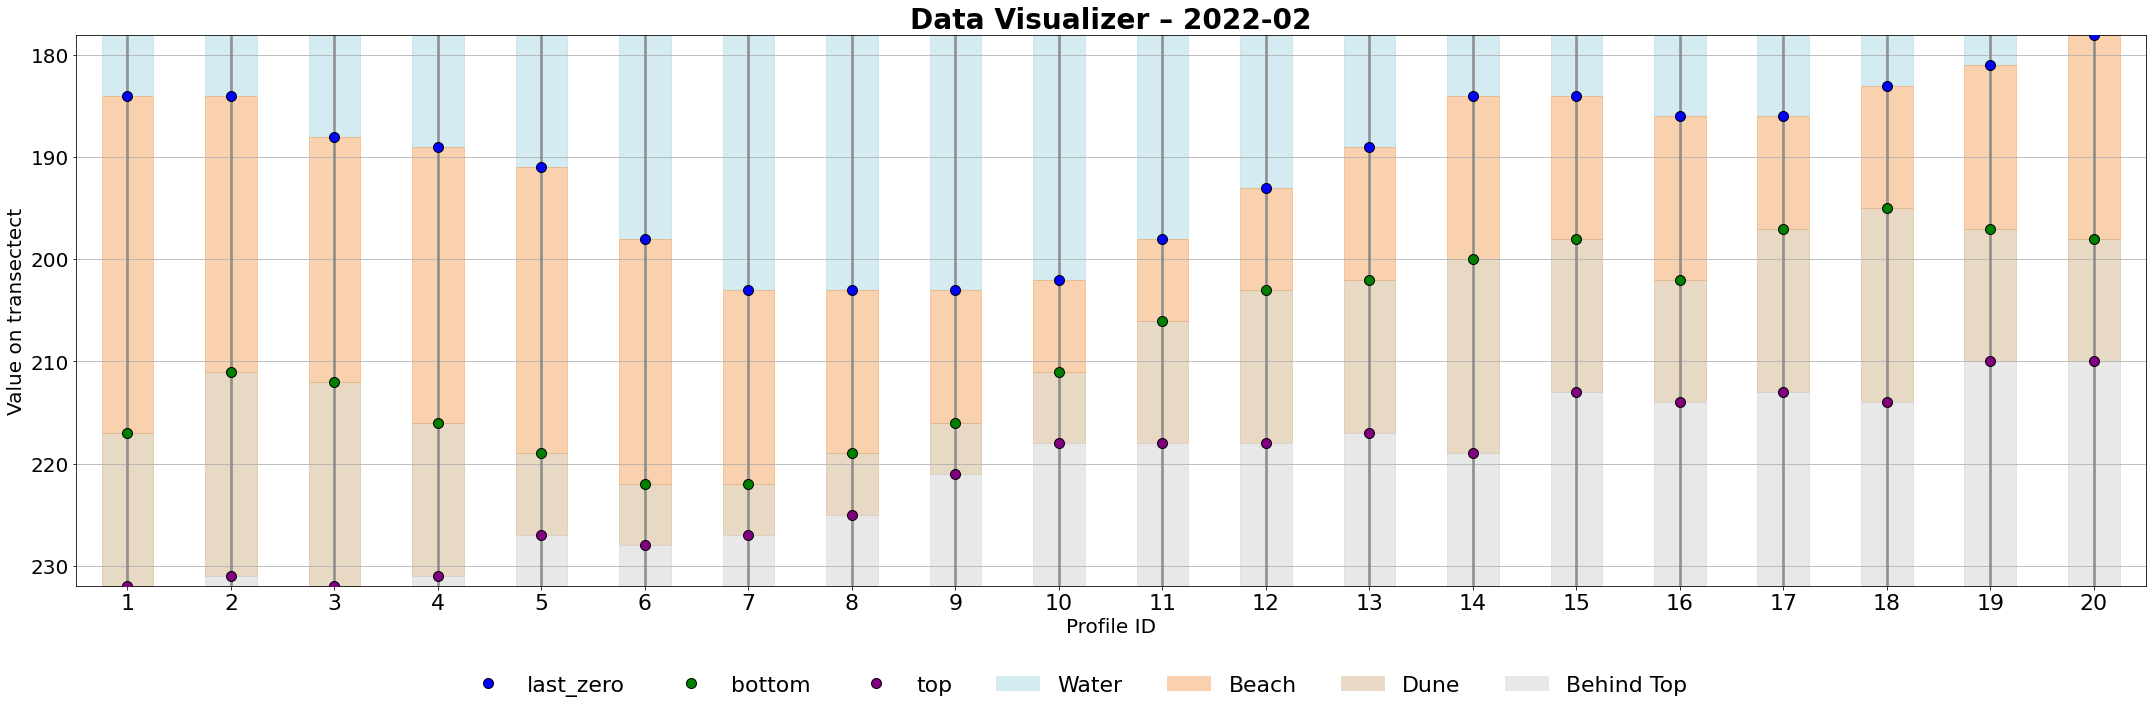

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import os

# PATH
FOLDER = '../demo/2022-02'  
OUTPUT_FOLDER = '../demo/data-visualiser'
CSV_PATH = os.path.join(FOLDER, 'output', 'finder', 'finder.csv')
OUTPUT_FILENAME = f"data-vis_{os.path.basename(FOLDER)}.jpg"

data = pd.read_csv(CSV_PATH)

# FIGURE
fig, ax = plt.subplots(figsize=(30, 10))

profile_ids = data['profile_id'].unique()

colors = {
    'last_zero': 'blue',
    'bottom': 'green',
    'top': 'purple'
}

spacing_factor = 0.5 #distance between profiles  )
bar_width = spacing_factor / 1 # bar width
x_values = [i for i in range(len(profile_ids))]

min_value = data[['last_zero', 'bottom', 'top']].min().min()
max_value = data[['last_zero', 'bottom', 'top']].max().max()

y_min = min_value
y_max = max_value


for i, profile_id in enumerate(profile_ids):
    subset = data[data['profile_id'] == profile_id]
    x = x_values[i]

    last_zero_y = subset['last_zero'].values[0]
    bottom_y = subset['bottom'].values[0]
    top_y = subset['top'].values[0]

    ax.plot([x, x], [y_min, y_max], color='gray', linestyle='-', linewidth=3, alpha=0.7)
    ax.scatter(x, last_zero_y, color=colors['last_zero'], edgecolor='black', s=100, zorder=3)
    ax.scatter(x, bottom_y, color=colors['bottom'], edgecolor='black', s=100, zorder=3)
    ax.scatter(x, top_y, color=colors['top'], edgecolor='black', s=100, zorder=3)

    ax.fill_betweenx([y_min, last_zero_y], x - bar_width/2, x + bar_width/2, color='lightblue', alpha=0.5)
    ax.fill_betweenx([last_zero_y, bottom_y], x - bar_width/2, x + bar_width/2, color='#F4A460', alpha=0.5)
    ax.fill_betweenx([bottom_y, top_y], x - bar_width/2, x + bar_width/2, color='#D2B48C', alpha=0.5)
    ax.fill_betweenx([top_y, y_max], x - bar_width/2, x + bar_width/2, color='lightgrey', alpha=0.5)

# FIGURE PARAMETERS
ax.set_xticks(x_values)
ax.set_xlabel('Profile ID', fontsize=20)
ax.set_ylabel('Value on transect', fontsize=20)
ax.set_title(f'Data Visualizer – {os.path.basename(FOLDER)}', fontsize=28, fontweight='bold')
ax.set_xticklabels(profile_ids, rotation=0, ha='center', fontsize=22)
ax.tick_params(axis='y', labelsize=20)
ax.set_ylim(y_min, y_max)
ax.set_xlim(min(x_values) - bar_width, max(x_values) + bar_width)
ax.invert_yaxis()
ax.grid(True)


legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='last_zero', markerfacecolor='blue', markersize=10, markeredgecolor='black'),
    plt.Line2D([0], [0], marker='o', color='w', label='bottom', markerfacecolor='green', markersize=10, markeredgecolor='black'),
    plt.Line2D([0], [0], marker='o', color='w', label='top', markerfacecolor='purple', markersize=10, markeredgecolor='black'),
    Patch(facecolor='lightblue', label='Water', alpha=0.5),
    Patch(facecolor='#F4A460', label='Beach', alpha=0.5),
    Patch(facecolor='#D2B48C', label='Dune', alpha=0.5),
    Patch(facecolor='lightgrey', label='Behind Top', alpha=0.5)
]

fig.legend(handles=legend_elements, title='', fontsize=22, title_fontsize=22,
           loc='lower center', bbox_to_anchor=(0.5, 0), ncol=7, frameon=False)

plt.tight_layout()
plt.subplots_adjust(bottom=0.18)  

os.makedirs(OUTPUT_FOLDER, exist_ok=True)
output_path = os.path.join(OUTPUT_FOLDER, OUTPUT_FILENAME)
plt.savefig(output_path, dpi=150)
plt.show()
